### Preguntas teóricas

*¿Qué es un paradigma de programación?* 

~ Un paradigma se puede entender como un modelo o patrón que sigue ciertos principios, conceptos, métodos, postulados, etc. y se sigue con cierto fin en específico, en el caso de la programación, para resolver distintas tareas o problemas. También, en el área estos se dividen en imperativos y declarativos, donde ambos grupos contienen distintos paradigmas más específicos, en particular, en el primer grupo es donde se encuentra la Programación orientada a Objetos.

*En qué se basa la programación orientada a objetos* 

~ A través de Clases y Objetos permite desarrollar código reutilizable de forma práctica. En estos, los Objetos correspondan a la realización de una Clase, la cual funciona como un "molde" y tiene ciertos atributos y métodos. Así, dichos Objetos pueden representar distintos elementos, conceptos o procesos, que interactúan entre sí. 

*¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación big O?* 

~ Que en iteraciones se repite varias veces un mismo procedimiento o función con distintas (o no) entradas. Mientras que en recursividad, tal función se llama a sí misma repetidamente hasta llegar a un caso base. Relacionado con la notación big O, es recomendable iteración por sobre recursión mientras más complejo es un código.

*explicar diferencia de rendimiento entre O(1) y O(n)* 

~ Que en O(1) el tiempo de ejecución de un algoritmo es independiente a la magnitud de la entrada (es el tipo de algoritmo más rápido). Mientras que en O(n) el tiempo empleado crece de forma lineal (directamente proporcional) al tamaño de la entrada.

*¿Cómo se calcula el orden en un programa que funciona por etapas?* 

~ La etapa que tiene un mayor orden es dominante por sobre el resto, asignando dicho orden al programa (similar a el análisis del orden de un polinomio).

*¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?*

~ Se determina en función de la cantidad de veces que el algoritmo se llama a sí mismo, donde si esto ocurre "m" veces, la complejidad temporal pasaría a ser O(m ^ n).




### Caminos en una PCB

* La PCB es una grilla de N*M
* A en esquina superior izquierda
* B en esquina inferior derecha
* solo movimientos horizontales y verticales en la grilla
* los movimientos solo pueden acercarse a B, no alejarse ni volver

Se pide programar una clase que sea capaz de calcular la cantidad posible de caminos entre A y B en al menos 2 formas distintas.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math
from time import perf_counter

##decorador
def tiempo_tiemposo(func): #recibe la funcion sobre la que se quiere medir el tiempo
    inicio = perf_counter()
    def intervalo(*args, **kwargs): #esta funcion es la que mide el tiempo (incio podria definirse dentro en vez de antes)
        funci = func(*args, **kwargs)
        time = perf_counter() - inicio
        return funci, time #entrega cantidad de caminos y tiempo de ejecucion en una tupla
    return intervalo 

##clase pedida
class PCB:
    def __init__(self, n:int, m:int) -> None:
        self.n = n
        self.m = m
        
    #funcion auxiliar
    def pos(self, k:int, l:int): 
        if k==1 or l==1:
            return 1
        else:
            return self.pos(k-1, l) + self.pos(k, l-1)
    
    # este metodo analiza las dos (o una) casillas de donde puedo llegar a donde me encuentro ahora
    # y suma ambos casos, realizacion esto desde el final hasta llegar a la casilla inicial (caso base)
    def caminos1(self): #devuelve un metodo el recursivo que en su caso base entrega un int
        return self.pos(self.n, self.m)
    
    #este metodo ve la situacion como un problema de combinatoria
    def caminos2(self) -> int:
        return math.factorial(self.n + self.m -2) \
            //(math.factorial(self.n -1) * math.factorial(self.m -1))

    # por recomendacion en clase auxiliar se define un metodo que indica cual opcion se quiere utilizar
    # para recorrer la PCB, esto facilita el uso del decorador en caso de recursividad
    @tiempo_tiemposo
    def el_camino(self, func):
        return func


In [40]:
pvc = PCB(6,3)

print(pvc.caminos1())
print(pvc.caminos2())

21
21


### Graficar

Se pide generar gráficos con el tiempo de ejecución de las soluciones.

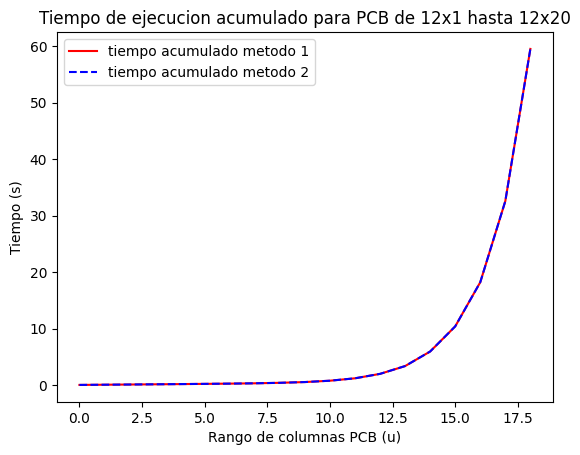

In [41]:
# se mantiene un lado de la PCB fijo y se varía la extensión del otro lado, entre m1 y m2
m1 = 1
m2 = 20

#conjuntos
tiempo_1 = [0 for m in range(m1, m2)]
tiempo_2 = [0 for m in range(m1, m2)]
M = [m for m in range(m1, m2)]

#recursion
k = 0
t1 = 0
t2 = 0
for m in M:
    pcb = PCB(12,m)
    t1 += pcb.el_camino(pcb.caminos1())[1]
    t2 += pcb.el_camino(pcb.caminos2())[1]
    tiempo_1[k] = t1
    tiempo_2[k] = t2
    k +=1
plt.plot(tiempo_1, 'r', label=r"tiempo acumulado metodo 1")
plt.plot(tiempo_2, 'b--', label=r"tiempo acumulado metodo 2")

plt.title("Tiempo de ejecucion acumulado para PCB de 12x1 hasta 12x20")
plt.xlabel("Rango de columnas PCB (u)")
plt.ylabel("Tiempo (s)")

plt.legend()
plt.show()


Se aprecia como ambos métodos diseñados presentan igual complejidad temporal